In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import local_signals, dataset, model, features
from sklearn.ensemble import RandomForestClassifier

`label_and_features` has 76 columns which are 1 label + 75 features:
Column index numbers are from 0 to 74.
index 0 is label (0-4)
index 1-20 is global aa comp.
index 21-40 global aa comp for Nterm50.
index 41-60 global aa comp for Cterm50.
index 61 gravy for Nterm50.
index 62 gravy for Cterm50.
index 63 mol wt.
index 64 mean flex.
index 65 aromaticity.
index 66 i.p.
index 67 net charge.
index 68 mnc.
index 69 tc.
index 70 mtc.
index 71 gravy.
index 72 length.
index 73 is mito
index 74 is nuclear
index 75 is secreted

In [12]:
label_and_features = np.genfromtxt('../datasets/fiveClass.csv', delimiter=',')
# 76 cols. 75 features  + label col at 0, and 3 SP columns at end.
label_and_features.shape

(9401, 76)

In [14]:
# ONLY RUN ONCE!
# drop mtc, signal peptides and Nterm50 and Cterm50 aa comps.
cols_to_remove  = list(range(21, 61)) + [70, 73, 74, 75]
print(len(cols_to_remove))
label_and_features_less = np.delete(label_and_features, cols_to_remove, axis=1)
label_and_features_less.shape

44


(9401, 32)

In [16]:
X_train_31, X_test_31, y_train_31, y_test_31 = model.split_train_test(label_and_features_less)

In [18]:
print(X_train_31.shape)
print(X_test_31.shape)
print(y_train_31.shape)
print(y_test_31.shape)

(7520, 31)
(1881, 31)
(7520,)
(1881,)


Trained in 6 secs
Train accuracy is 100.0


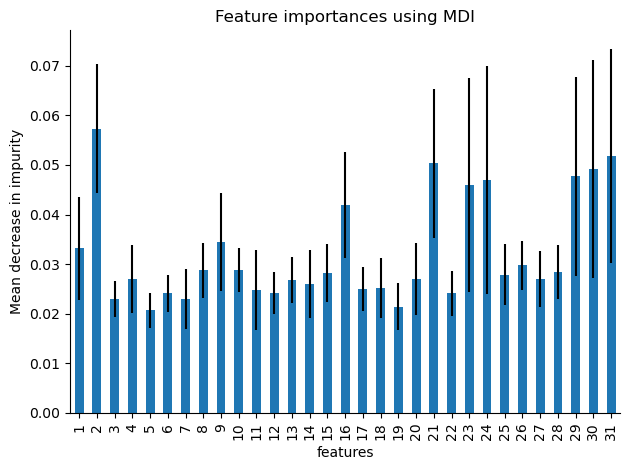

In [21]:
clf, importances = model.train_RFC(X_train_31, y_train_31)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = [f'{i}' for i in range(1, X_train_31.shape[1] +1)]
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
ax.set_xlabel('features', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.xticks(fontsize=10)
plt.show()


In [27]:
imps = list(round(forest_importances * 1000))
print(imps)
print(len(imps))

[33.0, 57.0, 23.0, 27.0, 21.0, 24.0, 23.0, 29.0, 34.0, 29.0, 25.0, 24.0, 27.0, 26.0, 28.0, 42.0, 25.0, 25.0, 21.0, 27.0, 50.0, 24.0, 46.0, 47.0, 28.0, 30.0, 27.0, 28.0, 48.0, 49.0, 52.0]
31


In [28]:
# predict_proba()
model.test_RFC(clf, X_test_31, y_test_31)

Test accuracy is 63.8


### PREDICT WITH 31 GIVES 63.8%

In [49]:
# MITOCHONDRIAL
rows_inds_pred_mito = np.where(X_test[:, 72] == 1)[0].tolist()
print(rows_inds_pred_mito)
print(len(rows_inds_pred_mito))

[140, 220, 461, 495, 514, 531, 651, 656, 686, 723, 754, 786, 790, 852, 940, 1014, 1174, 1248, 1282, 1318, 1387, 1456, 1557, 1602, 1678, 1685, 1788, 1820, 1851]
29


In [33]:
predicted_to_be_2_mito = y_test[rows_inds_pred_mito]
print(list(predicted_to_be_2_mito))
count = np.count_nonzero(predicted_to_be_2_mito == 2)
round(100 * count/len(predicted_to_be_2_mito), 1)

[3.0, 0.0, 0.0, 4.0, 2.0, 0.0, 0.0, 0.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 4.0, 3.0, 0.0, 2.0, 3.0, 4.0, 3.0, 2.0, 0.0, 0.0, 3.0, 0.0]


27.6

In [20]:
print(list(X_test[140, :]))

[76.0, 5.0, 78.0, 68.0, 55.0, 61.0, 12.0, 56.0, 63.0, 76.0, 20.0, 40.0, 65.0, 25.0, 58.0, 86.0, 71.0, 50.0, 10.0, 25.0, 80.0, 0.0, 20.0, 60.0, 40.0, 40.0, 0.0, 80.0, 60.0, 60.0, 80.0, 40.0, 60.0, 20.0, 60.0, 120.0, 40.0, 80.0, 0.0, 60.0, 60.0, 20.0, 80.0, 40.0, 20.0, 20.0, 20.0, 80.0, 80.0, 100.0, 0.0, 0.0, 60.0, 60.0, 100.0, 120.0, 60.0, 40.0, 20.0, 20.0, 2.0, -62.0, 67.0, 1007.0, 90.0, 521.0, -1560.0, -259.0, 161.0, 27.0, -48.0, 603.0, 1.0, 0.0, 0.0]


if (i, 73) == 1, labels is predicted to be 2 (mito)
if (i, 74) == 1, labels is predicted to be 3 (nuclear)
if (i, 75) == 1, labels is predicted to be 1 (secreted)

In [48]:
# NUCLEUS
rows_inds_pred_nucl = np.where(X_test[:, 73] == 1)[0].tolist()
print(rows_inds_pred_nucl)
print(len(rows_inds_pred_nucl))

[13, 15, 17, 46, 48, 57, 59, 97, 108, 118, 126, 184, 194, 198, 217, 243, 257, 273, 274, 282, 331, 336, 374, 378, 396, 416, 426, 440, 443, 448, 490, 524, 552, 559, 578, 613, 637, 649, 650, 655, 657, 668, 681, 682, 700, 762, 784, 804, 807, 827, 851, 896, 924, 927, 938, 951, 958, 998, 1009, 1012, 1019, 1022, 1023, 1040, 1048, 1092, 1102, 1130, 1133, 1135, 1150, 1171, 1175, 1176, 1200, 1204, 1215, 1217, 1238, 1243, 1255, 1259, 1266, 1275, 1280, 1291, 1296, 1298, 1348, 1353, 1368, 1378, 1380, 1392, 1394, 1419, 1420, 1425, 1428, 1456, 1457, 1460, 1471, 1472, 1497, 1503, 1512, 1541, 1542, 1554, 1570, 1573, 1580, 1583, 1587, 1604, 1613, 1632, 1636, 1714, 1720, 1721, 1749, 1755, 1768, 1780, 1798, 1806, 1813, 1832, 1834, 1840, 1841, 1848, 1864]
135


In [35]:
predicted_to_be_3_nucl= y_test[rows_inds_pred_nucl]
print(list(predicted_to_be_3_nucl))
count = np.count_nonzero(predicted_to_be_3_nucl == 3)
round(100 * count/len(predicted_to_be_3_nucl), 1)

[3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 2.0, 3.0, 3.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 4.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 4.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 1.0, 0.0, 3.0, 3.0, 1.0]


68.9

In [47]:
# SECRETED
rows_inds_pred_secr = np.where(X_test[:, 74] == 1)[0].tolist()
print(rows_inds_pred_secr)
print(len(rows_inds_pred_secr))

[20, 196, 197, 234, 270, 275, 305, 364, 401, 406, 463, 526, 564, 593, 689, 794, 796, 901, 956, 992, 1007, 1100, 1132, 1138, 1173, 1177, 1215, 1322, 1344, 1360, 1460, 1543, 1578, 1594, 1653, 1747, 1828, 1874]
38


In [43]:
predicted_to_be_1_secr = y_test[rows_inds_pred_secr]
print(list(predicted_to_be_1_secr))
count = np.count_nonzero(predicted_to_be_1_secr == 1)
print(round(100 * count/len(predicted_to_be_1_secr), 1))

count = np.count_nonzero(predicted_to_be_1_secr == 4)
print(round(100 * count/len(predicted_to_be_1_secr), 1))


[1.0, 4.0, 4.0, 4.0, 4.0, 0.0, 2.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 0.0, 3.0, 3.0, 1.0, 4.0, 4.0, 2.0, 4.0, 3.0, 4.0, 1.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
21.1
57.9


Seems secretory search method finds 'other' better than it finds secretory proteins.

In [46]:
rows_to_remove  = list(set(rows_inds_pred_nucl + rows_inds_pred_secr + rows_inds_pred_mito))
print(len(rows_to_remove))
X_test_less = np.delete(X_test, rows_to_remove, axis=0)
X_test_less.shape

199


(1682, 75)

In [ ]:
cyto, mito, secreted, nuclear, other = 'cyto', 'mito', 'secreted', 'nuclear', 'other'
labels = {cyto: 0, secreted: 1, mito: 2, nuclear: 3, other: 4}

In [39]:
set_nucl  = set(rows_inds_pred_nucl)
set_secr = set(rows_inds_pred_secr)
set_mito = set(rows_inds_pred_mito)
common_inds = set_nucl.intersection(set_secr)
common_inds

{1215, 1460}

In [40]:
common_inds = set_nucl.intersection(set_mito)
common_inds

{1456}

In [41]:
common_inds = set_mito.intersection(set_secr)
common_inds

set()

In [42]:
common_inds = set_mito.intersection(set_secr, set_nucl)
common_inds

set()

In [60]:
def train_RFC(X_train, y_train):
    clf = RandomForestClassifier()
    start = time()
    clf.fit(X_train, y_train)
    importances = clf.feature_importances_
    print(f'Trained in {round((time() - start))} secs')
    preds = clf.predict(X_train)
    acc = round(accuracy_score(y_train, preds) * 100, 1)
    print(f'Train accuracy is {acc}')
    return clf, importances

In [61]:
clf, importances = train_RFC(X_train, y_train)

Trained in 5 secs
Train accuracy is 100.0


In [55]:
y_test_less = np.delete(y_test, rows_to_remove, axis=0)
y_test_less.shape

(1682,)

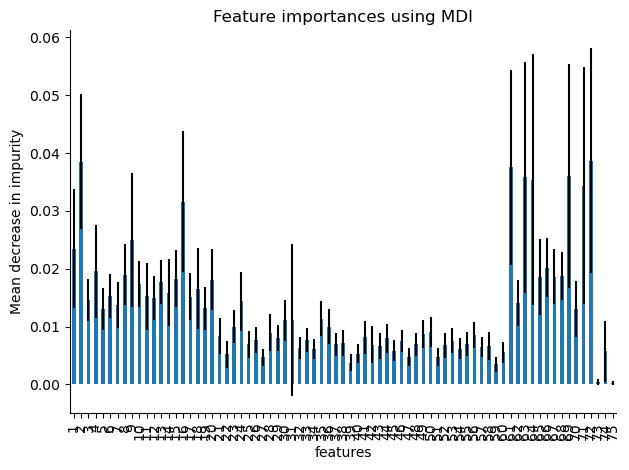

In [58]:

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = [f'{i}' for i in range(1, 76)]
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Feature importances using MDI')
ax.set_ylabel('Mean decrease in impurity')
ax.set_xlabel('features', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.tight_layout()
plt.xticks(fontsize=10)
plt.show()


In [62]:
def test_RFC(clf, X_test, y_test):
    preds = clf.predict(X_test)
    acc = round(accuracy_score(y_test, preds) * 100, 1)
    print(f'Test accuracy is {acc}')

predict_proba()
test_RFC(clf, X_test_less, y_test_less)

Test accuracy is 63.3
